### Remote Working

In this notebook, I'm trying to figure out whether **respondants who mostly work remotely have a different view point to that of non/rare remote workers, on collaborating with peers remotely versus on site**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 2 columns which relate to working remotely; **HomeRemote and CollaborateRemote**

A few days each month                                      5876
Never                                                      5288
All or almost all the time (I'm full-time remote)          1922
Less than half the time, but at least one day each week    1464
More than half, but not all, the time                       676
It's complicated                                            633
About half the time                                         612
Name: HomeRemote, dtype: int64


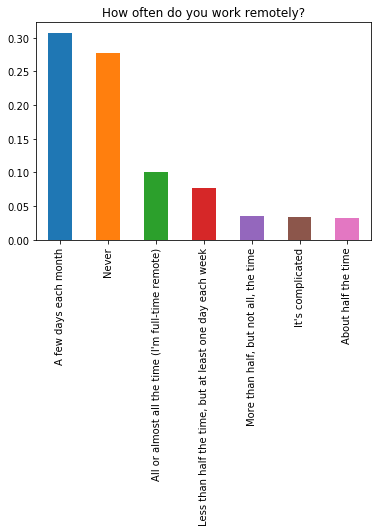

In [10]:
#Let's find out what are the different HomeRemote values in the dataset

remote_working_vals = df.HomeRemote.value_counts()

print(remote_working_vals)

#below is a bar chart of the proportion of individuals in each remote working category 

(remote_working_vals/df.shape[0]).plot(kind="bar");
plt.title("How often do you work remotely?");

In [9]:
#here we're getting the description of CollaborateRemote column

def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column']==column_name]['Question'])[0]
    return desc

get_description('CollaborateRemote')

"It's harder to collaborate with remote peers than those on site"

In [17]:
df.CollaborateRemote.value_counts()

Somewhat agree       3404
Agree                3388
Disagree             2374
Strongly agree       1341
Strongly disagree     623
Name: CollaborateRemote, dtype: int64

In [13]:
# now respondants of the survey are divided into 2 main categories based on the time they work remotely
# 1. Respondants who work remote often (wor)
# 2. Respondants who don't work remotely/very rarely

remote_status = ['All or almost all the time (I''m full-time remote)','More than half, but not all, the time','About half the time ']
non_remote_status = ['A few days each month','Never','Less than half the time, but at least one day each week','It''s complicated']

def works_remotely(home_remote_str):
    '''
    INPUT
        home_remote_str - a string of one of the values from the HomeRemote column
    
    OUTPUT
        return 1 if the string is  in remote_status list
        return 0 otherwise
    
    '''
    if home_remote_str in remote_status:
        return 1
    else:
        return 0


In [18]:
df['RemoteWorker']=df["HomeRemote"].apply(works_remotely)

Now we would like to find out if the proportion of respondants who work remote mostly, feel differently than those that do not. 

Store a dataframe of only the individual's who had RemoteWorker equal to 1 in remote_rows. Similarly, store a dataframe of only the RemoteWorker equal to 0 values in non_remote_rows.

In [24]:
remote_rows = df[df['RemoteWorker']==1]      # Subset df to only those who work remote often
non_remote_rows = df[df['RemoteWorker']==0]  # Subset df to only those who don't work remotely/very rarely

In [31]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [32]:
#possible values in CollaborateRemote column
possible_vals = ["Somewhat agree", "Agree", "Disagree", "Strongly agree", "Strongly disagree"]

def clean_and_plot(df, title, plot=True):
    '''
    INPUT 
        df - a dataframe holding the CollaborateRemote column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        remote_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CollaborateRemote column.
    '''
    view = df['CollaborateRemote'].value_counts().reset_index()
    view.rename(columns={'index': 'method', 'CollaborateRemote': 'count'}, inplace=True)
    remote_df = total_count(view, 'method', 'count', possible_vals)

    remote_df.set_index('method', inplace=True)
    if plot:
        (remote_df/remote_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_remote_df = remote_df/remote_df.sum()
    return props_remote_df

In [33]:
remote_perc = clean_and_plot(remote_rows, 'Remote Workers Responds', plot=False)
non_remote_perc = clean_and_plot(non_remote_rows, 'Non Remote Workers Responds', plot=False)

comp_df = pd.merge(remote_perc, non_remote_perc, left_index=True, right_index=True)
comp_df.columns = ['remote_perc', 'non_remote_perc']
comp_df['Diff_Remote_Vals'] = comp_df['remote_perc'] - comp_df['non_remote_perc']
comp_df.style.bar(subset=['Diff_Remote_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,remote_perc,non_remote_perc,Diff_Remote_Vals
method,,,
Somewhat agree,0.340369,0.304623,0.0357466
Disagree,0.295515,0.210399,0.0851155
Agree,0.237467,0.306762,-0.0692951
Strongly disagree,0.0686016,0.0555297,0.0130719
Strongly agree,0.0580475,0.122686,-0.0646388


In [35]:
# by considering 'Somewhat agree', 'Agree' and 'Strongly agree' as Agree
remote_workers_who_agree = 0.340369 + 0.237467 + 0.0580475
remote_workers_who_agree

0.6358835

In [36]:
non_remote_workers_who_agree = 0.304623 + 0.306762 + 0.122686
non_remote_workers_who_agree

0.7340709999999999

When comparing above figures, it seems that **a higher percentage of people (73%), who don't work much remotely think, it's harder to collaborate with remote peers than on site peers. But a lesser percentage of people (64%) who are actually remote workers agrees that, it's hard to collaborate with peers remotely.**

This might be due to the **lack of experience of non-remote workers.**

Thus, if an IT company is moving towards working remotely, it's important for that company to raise awareness and introduce flexible/easy to use collaborative tools to employees to change their mindset.